### Buferring

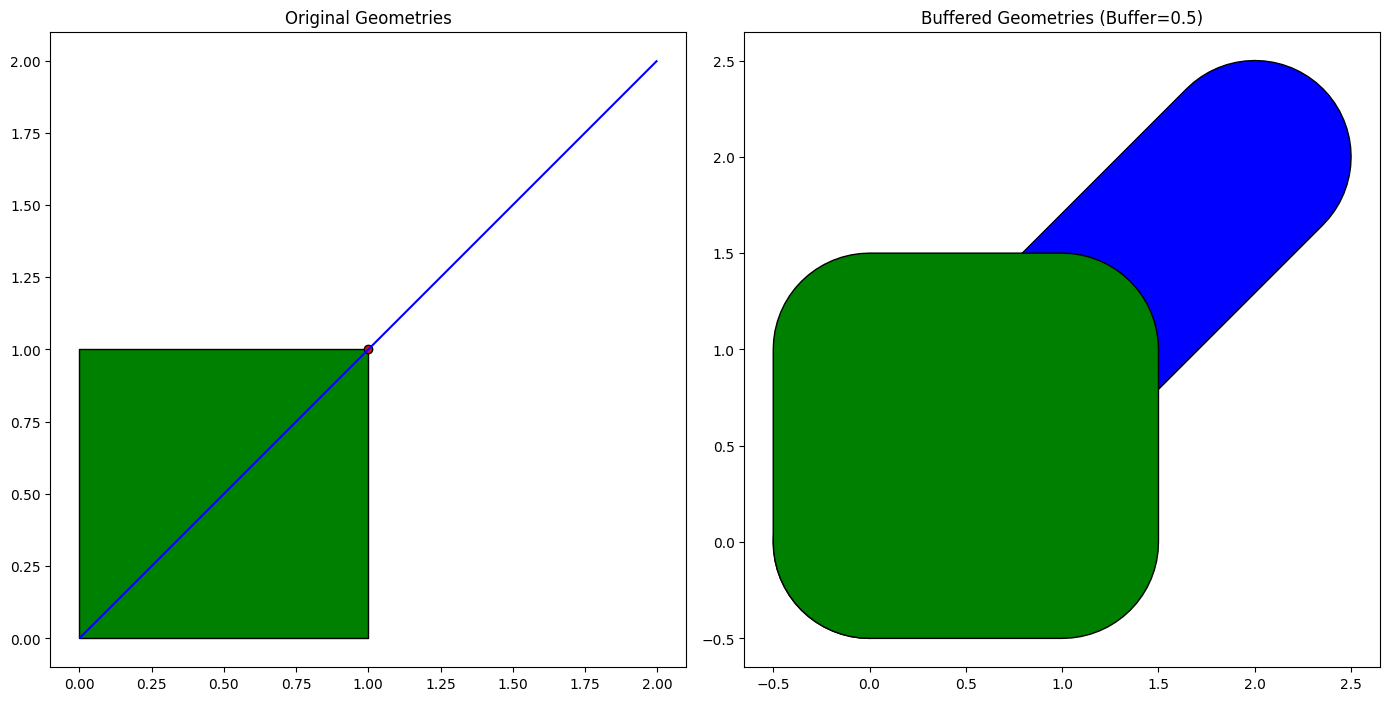

In [5]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt

# Create a GeoSeries with different geometry types
geo_series = gpd.GeoSeries([
    Point(1, 1),  # Point
    LineString([(0, 0), (1, 1), (2, 2)]),  # LineString
    Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])  # Polygon
])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({
    'name': ['Point A', 'Line B', 'Polygon C'],
    'geometry': geo_series
})

# Apply buffer with distance 0.5
gdf['buffered_geometry'] = gdf.geometry.buffer(0.5)

# Plot original and buffered geometries
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot original geometries
gdf.plot(ax=ax[0], color=['red', 'blue', 'green'], edgecolor='black')
ax[0].set_title("Original Geometries")

# Plot buffered geometries
gdf.set_geometry('buffered_geometry').plot(ax=ax[1], color=['red', 'blue', 'green'], edgecolor='black')
ax[1].set_title("Buffered Geometries (Buffer=0.5)")

# Show the plot
plt.tight_layout()
plt.show()


### Convex Hull

/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_19614/3223319836.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  convex_hull = gdf_points.unary_union.convex_hull
/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_19614/3223319836.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


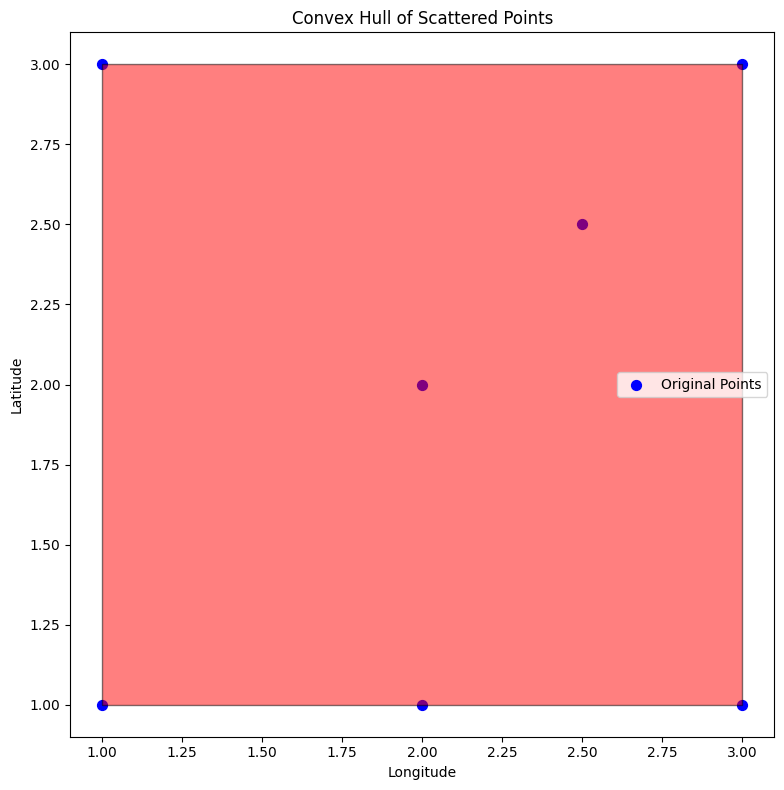

In [12]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint
import matplotlib.pyplot as plt

# Create a set of scattered points
points = [
    Point(1, 1), Point(2, 1), Point(3, 1),
    Point(2, 2), Point(3, 3), Point(1, 3),
    Point(2.5, 2.5)
]

# Create a GeoSeries of these points
gdf_points = gpd.GeoSeries(points)

# Calculate the convex hull around all the points
convex_hull = gdf_points.unary_union.convex_hull

# Plot the original points and the convex hull
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot the original points
gdf_points.plot(ax=ax, color='blue', marker='o', markersize=50, label='Original Points')

# Plot the convex hull
gpd.GeoSeries([convex_hull]).plot(ax=ax, color='red', alpha=0.5, edgecolor='black', label='Convex Hull')

# Customize plot
ax.set_title("Convex Hull of Scattered Points")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()

plt.tight_layout()
plt.show()


/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_19614/1234031158.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


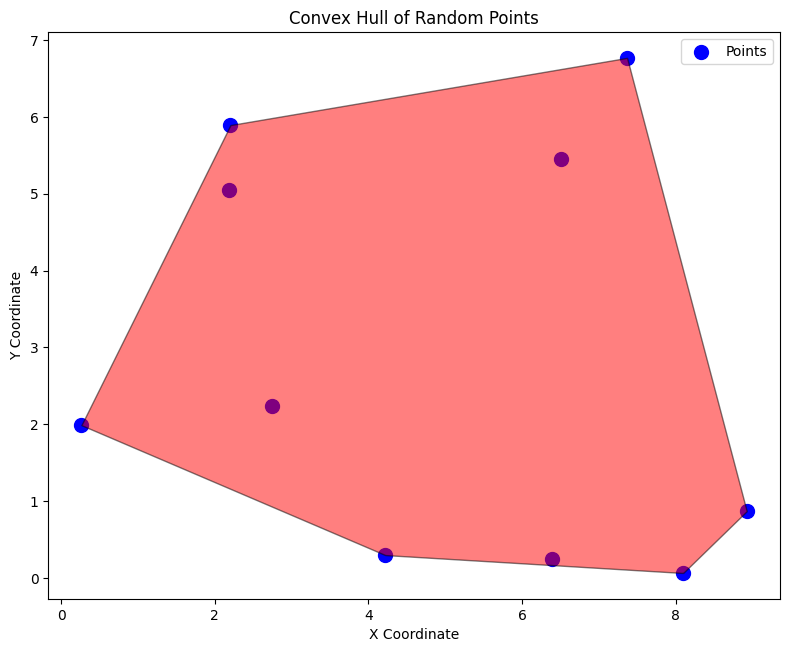

In [15]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import random

# Generate random points
random.seed(42)  # For reproducibility
num_points = 10
points = [Point(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(num_points)]

# Create a GeoSeries from the points
gdf_points = gpd.GeoSeries(points)

# Calculate the convex hull
convex_hull = gdf_points.union_all().convex_hull

# Plot the original points and their convex hull
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot the points
gdf_points.plot(ax=ax, color='blue', marker='o', markersize=100, label='Points')

# Plot the convex hull
gpd.GeoSeries([convex_hull]).plot(ax=ax, color='red', alpha=0.5, edgecolor='black', label='Convex Hull')

# Customize plot
ax.set_title("Convex Hull of Random Points")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
plt.legend()

plt.tight_layout()
plt.show()


### Praktik Buffering

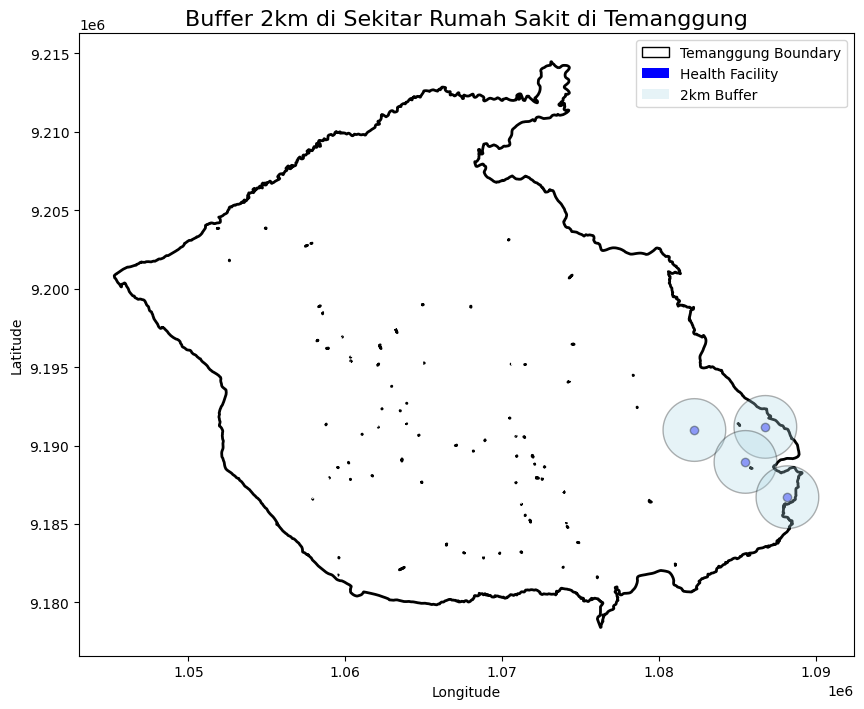

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Membaca peta batas kabupaten
map_regency = gpd.read_file("./data/BATAS KABUPATEN KOTA DESEMBER 2019 DUKCAPIL/")
map_regency = map_regency.to_crs(epsg=32748)

# Pilih kabupaten berdasarkan nama
selected_regency_name = 'Temanggung'
map_temanggung = map_regency[map_regency['KAB_KOTA'].str.lower() == selected_regency_name.lower()]

# Membaca data geospatial dari rumah sakit
rs_point = gpd.read_file("./data/rumah sakit temanggung/")
rs_point = rs_point.to_crs(epsg=32748)

# Membuat buffer dengan radius 2 km di sekitar rumah sakit
rs_point['buffer_2km'] = rs_point.geometry.buffer(2000)  # Asumsikan CRS dalam meter

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Temanggung boundary
map_temanggung.plot(ax=ax, color='none', edgecolor='black', linewidth=2)

# Plot rumah sakit (points)
rs_point.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

# Plot zona buffer sebesar 2km
rs_point.set_geometry('buffer_2km').plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.3)

# Custom legend patches
boundary_patch = mpatches.Patch(facecolor='none', edgecolor='black', label='Temanggung Boundary')
facility_patch = mpatches.Patch(facecolor='blue', label='Health Facility')
buffer_patch = mpatches.Patch(facecolor='lightblue', alpha=0.3, label='2km Buffer')

plt.legend(handles=[boundary_patch, facility_patch, buffer_patch])

# Custom label
plt.title("Buffer 2km di Sekitar Rumah Sakit di Temanggung", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Menampilkan plot
plt.show()


### Praktik Convex Hull

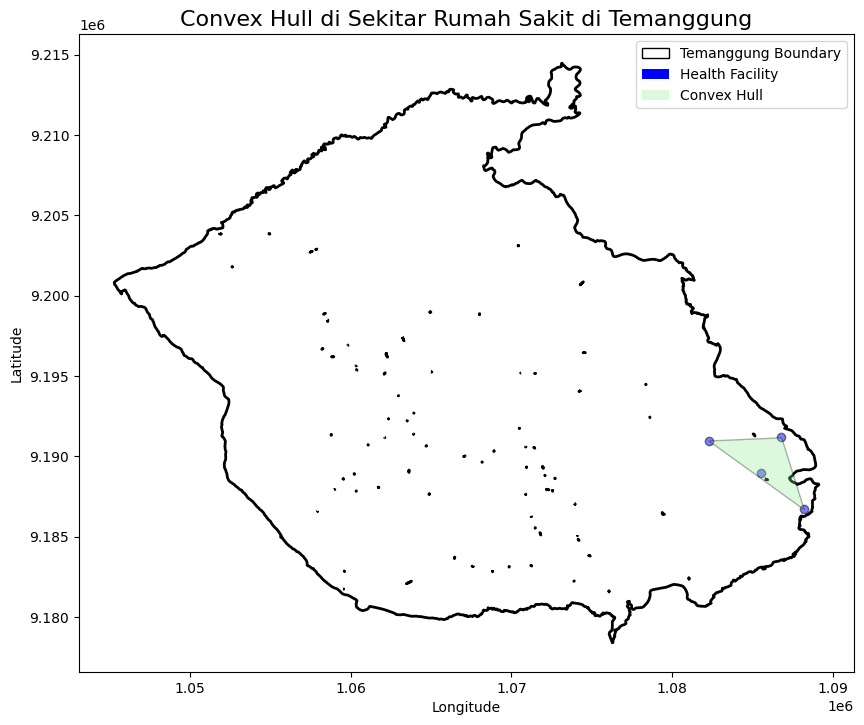

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Membaca peta batas kabupaten
map_regency = gpd.read_file("./data/BATAS KABUPATEN KOTA DESEMBER 2019 DUKCAPIL/")
map_regency = map_regency.to_crs(epsg=32748)

# Pilih kabupaten berdasarkan nama
selected_regency_name = 'Temanggung'
map_temanggung = map_regency[map_regency['KAB_KOTA'].str.lower() == selected_regency_name.lower()]

# Membaca data geospatial dari rumah sakit
rs_point = gpd.read_file("./data/rumah sakit temanggung/")
rs_point = rs_point.to_crs(epsg=32748)

# Membuat convex hull yang mengelilingi semua rumah sakit
convex_hull = rs_point.geometry.union_all().convex_hull

fig, ax = plt.subplots(figsize=(10, 10))
# Plot Temanggung boundary
map_temanggung.plot(ax=ax, color='none', edgecolor='black', linewidth=2)

# Plot rumah sakit (points)
rs_point.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

# Plot convex hull
gpd.GeoSeries([convex_hull]).plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.3)

# Custom legend
boundary_patch = mpatches.Patch(facecolor='none', edgecolor='black', label='Temanggung Boundary')
facility_patch = mpatches.Patch(facecolor='blue', label='Health Facility')
convex_hull_patch = mpatches.Patch(facecolor='lightgreen', alpha=0.3, label='Convex Hull')

plt.legend(handles=[boundary_patch, facility_patch, convex_hull_patch])

plt.title("Convex Hull di Sekitar Rumah Sakit di Temanggung", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

### kombinasi convex hull & buffer

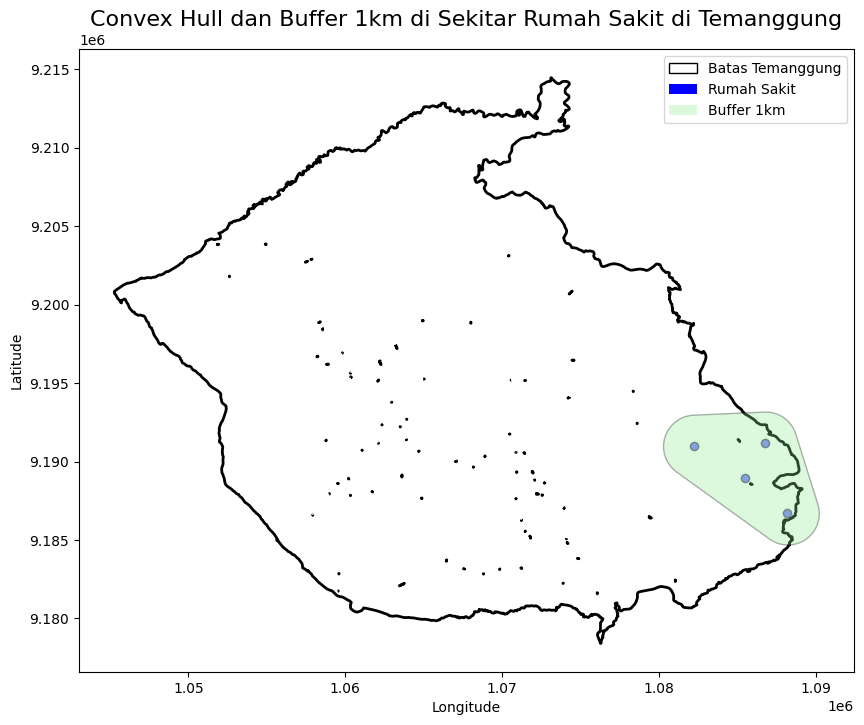

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Membaca peta batas kabupaten
map_regency = gpd.read_file("./data/BATAS KABUPATEN KOTA DESEMBER 2019 DUKCAPIL/")
map_regency = map_regency.to_crs(epsg=32748)  # Mengubah CRS menjadi UTM zona 48S (EPSG:32748)

# Pilih kabupaten berdasarkan nama
selected_regency_name = 'Temanggung'
map_temanggung = map_regency[map_regency['KAB_KOTA'].str.lower() == selected_regency_name.lower()]

# Membaca data geospatial dari rumah sakit
rs_point = gpd.read_file("./data/rumah sakit temanggung/")
rs_point = rs_point.to_crs(epsg=32748)  # Mengubah CRS untuk kesesuaian

# Membuat convex hull yang mengelilingi semua rumah sakit
convex_hull = rs_point.geometry.union_all().convex_hull

# Membuat buffer 1 km di sekitar convex hull
buffered_hull = convex_hull.buffer(2000)  # Buffer dalam satuan meter, jadi 2000m = 2km

# Membuat GeoDataFrame untuk visualisasi buffer
gdf_hull_buffer = gpd.GeoDataFrame(geometry=[buffered_hull], crs=rs_point.crs)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot batas kabupaten Temanggung
map_temanggung.plot(ax=ax, color='none', edgecolor='black', linewidth=2, label='Batas Temanggung')

# Plot titik rumah sakit
rs_point.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Rumah Sakit')

# Plot convex hull dan buffer di sekitar rumah sakit
gdf_hull_buffer.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.3, label='Buffer 1km')

# Membuat legenda custom
boundary_patch = mpatches.Patch(facecolor='none', edgecolor='black', label='Batas Temanggung')
facility_patch = mpatches.Patch(facecolor='blue', label='Rumah Sakit')
buffer_patch = mpatches.Patch(facecolor='lightgreen', alpha=0.3, label='Buffer 1km')

# Menambahkan legenda
plt.legend(handles=[boundary_patch, facility_patch, buffer_patch])

# Kustomisasi plot
plt.title("Convex Hull dan Buffer 1km di Sekitar Rumah Sakit di Temanggung", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Menampilkan plot
plt.show()